# Pandas (5)
파이썬의 데이터 분석 라이브러리

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### < DataFrame 인덱스 설정 및 제거 >

때로는 DataFrame에 row index로 들어가 있어야 할 데이터가 DataFrame 객체의 column에 들어가 있거나 반대로 DataFrame 객체의 column이어야 할 항목이 row 
index로 되어 있을 수 있습니다. 

이 때는 set_index() 메서드나 reset_index() 메서드를 적절히 사용하여 index와 DataFrame의 column의 위치를 교환할 수 있습니다.

- set_index : 기존의 row index를 제거하고 DataFrame 객체의 column 중 하나를 
인덱스로 설정합니다.
- reset_index : 기존의 row index를 DataFrame 객체의 column으로 추가합니다. 
그리고 RangeIndex로 순번을 새롭게 매깁니다.

In [3]:
np.random.seed(0)
df1 = pd.DataFrame(np.vstack([list('ABCED'),
                              np.round(np.random.rand(3, 5), 2)]).T,
                   columns = ["C1", "C2", "C3", "C4"])
df1

,C1,C2,C3,C4
0,A,0.55,0.65,0.79
1,B,0.72,0.44,0.53
2,C,0.6,0.89,0.57
3,E,0.54,0.96,0.93
4,D,0.42,0.38,0.07


In [ ]:
df2 = df1.set_index("C1")
df2

### < DataFrame 인덱스 설정 및 제거 >
- 마찬가지로 C2 column을 인덱스로 지정하면 기존의 인덱스는 사라집니다.

In [6]:
df2.set_index("C2")

,C3,C4
C2,,
0.55,0.65,0.79
0.72,0.44,0.53
0.6,0.89,0.57
0.54,0.96,0.93
0.42,0.38,0.07


- 반대로 reset_index 메서드를 쓰면 인덱스를 보통의 자료열로 바꿀 수도 있습니다. 
- 이때 인덱스 column은 자료열의 가장 선두로 삽입됩니다. 
- DataFrame의 인덱스는 정수로 된 디폴트 인덱스로 바뀝니다.

In [9]:
df2 = df1.set_index("C1")
df2

,C2,C3,C4
C1,,,
A,0.55,0.65,0.79
B,0.72,0.44,0.53
C,0.6,0.89,0.57
E,0.54,0.96,0.93
D,0.42,0.38,0.07


In [10]:
df2.reset_index()

,C1,C2,C3,C4
0,A,0.55,0.65,0.79
1,B,0.72,0.44,0.53
2,C,0.6,0.89,0.57
3,E,0.54,0.96,0.93
4,D,0.42,0.38,0.07


- reset_index() 메서드를 호출할 때 인수 drop=True로 인수로 전달하면 인덱스 
column을 보통의 자료열로 올리는 것이 아니라 그냥 버리게 됩니다.

In [11]:
df2 = df1.set_index("C1")
df2

,C2,C3,C4
C1,,,
A,0.55,0.65,0.79
B,0.72,0.44,0.53
C,0.6,0.89,0.57
E,0.54,0.96,0.93
D,0.42,0.38,0.07


In [12]:
df2.reset_index(drop = True)

,C2,C3,C4
0,0.55,0.65,0.79
1,0.72,0.44,0.53
2,0.6,0.89,0.57
3,0.54,0.96,0.93
4,0.42,0.38,0.07


### < 연습 문제 >
New York Jets 팀에서 나이가 가장 많은 선수가 누구이며, 그의 생일을 조회해 보세요.
- index를 Team으로 변경하세요. 단 기존 index는 column으로 다시 복원합니다.

In [13]:
nfl = pd.read_csv("datas/nfl.csv",
                  parse_dates = ["Birthday"],
                  index_col = ["Name"])
nfl

,Team,Position,Birthday,Salary
Name,,,,
Tremon Smith,Philadelphia Eagles,RB,1996-07-20,570000
Shawn Williams,Cincinnati Bengals,SS,1991-05-13,3500000
Adam Butler,New England Patriots,DT,1994-04-12,645000
Derek Wolfe,Denver Broncos,DE,1990-02-24,8000000
Jake Ryan,Jacksonville Jaguars,OLB,1992-02-27,1000000
...,...,...,...,...
Bashaud Breeland,Kansas City Chiefs,CB,1992-01-30,805000
Craig James,Philadelphia Eagles,CB,1996-04-29,570000
Jonotthan Harrison,New York Jets,C,1991-08-25,1500000


In [33]:
nfl2 = nfl.reset_index().set_index("Team")

nfl2

,Name,Position,Birthday,Salary
Team,,,,
Philadelphia Eagles,Tremon Smith,RB,1996-07-20,570000
Cincinnati Bengals,Shawn Williams,SS,1991-05-13,3500000
New England Patriots,Adam Butler,DT,1994-04-12,645000
Denver Broncos,Derek Wolfe,DE,1990-02-24,8000000
Jacksonville Jaguars,Jake Ryan,OLB,1992-02-27,1000000
...,...,...,...,...
Kansas City Chiefs,Bashaud Breeland,CB,1992-01-30,805000
Philadelphia Eagles,Craig James,CB,1996-04-29,570000
New York Jets,Jonotthan Harrison,C,1991-08-25,1500000


In [34]:
nfl3= nfl2.loc["New York Jets"].nsmallest(1, "Birthday")

nfl3

,Name,Position,Birthday,Salary
Team,,,,
New York Jets,Ryan Kalil,C,1985-03-29,2400000


### < 연습 문제 >

5명의 학생의 국어, 영어, 수학 점수를 나타내는 DataFrame을 다음과 같이 만듭니다.

(1) “이름” column을 인덱스로 만들어보세요.

(2) (1)에서 인덱스로 만든 “이름”을 다시 column으로 복원하세요.

In [36]:
data = { "이름" : ["일식", "이식", "삼식", "사식", "오식"],
        "국어" : ["60", "70", "90", "80", "100"],
        "영어" : ["70", "86", "82", "88", "100"],
        "수학" : ["65", "82", "85", "90", "100"]
       }

score = pd.DataFrame(data)
score

,이름,국어,영어,수학
0,일식,60,70,65
1,이식,70,86,82
2,삼식,90,82,85
3,사식,80,88,90
4,오식,100,100,100


In [37]:
# (1) 
a = score.set_index("이름")
a

,국어,영어,수학
이름,,,
일식,60,70,65
이식,70,86,82
삼식,90,82,85
사식,80,88,90
오식,100,100,100


In [40]:
# (2)
b = a.reset_index()
b

,이름,국어,영어,수학
0,일식,60,70,65
1,이식,70,86,82
2,삼식,90,82,85
3,사식,80,88,90
4,오식,100,100,100


### < DataFrame dropna() 메서드 >
- DataFrame 객체에서 dropna() 메서드는 결측치를 갖는 행에 대해 제거를 합니다. 
- 기본적인 동작은 행에 단 하나라도 결측치가 있다면 해당 행을 지웁니다. 

In [44]:
employees = pd.read_csv("datas/employees.csv",
                        parse_dates = ["Start Date"])
employees

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,NaN,True,Marketing
1,Thomas,Male,1996-03-31,61933.0,True,NaN
2,Maria,Female,NaT,130590.0,False,Finance
3,Jerry,NaN,2005-03-04,138705.0,True,Finance
4,Larry,Male,1998-01-24,101004.0,True,IT
...,...,...,...,...,...,...
996,Phillip,Male,1984-01-31,42392.0,False,Finance
997,Russell,Male,2013-05-20,96914.0,False,Product
998,Larry,Male,2013-04-20,60500.0,False,Business Dev
999,Albert,Male,2012-05-15,129949.0,True,Sales


In [45]:
employees.dropna()

,First Name,Gender,Start Date,Salary,Mgmt,Team
4,Larry,Male,1998-01-24,101004.0,True,IT
5,Dennis,Male,1987-04-18,115163.0,False,Legal
6,Ruby,Female,1987-08-17,65476.0,True,Product
8,Angela,Female,2005-11-22,95570.0,True,Engineering
9,Frances,Female,2002-08-08,139852.0,True,Business Dev
...,...,...,...,...,...,...
994,George,Male,2013-06-21,98874.0,True,Marketing
996,Phillip,Male,1984-01-31,42392.0,False,Finance
997,Russell,Male,2013-05-20,96914.0,False,Product
998,Larry,Male,2013-04-20,60500.0,False,Business Dev


- 행 안에 모든 값이 결측치를 가질 때만 해당 행을 제거하고 싶다면! (employees 에선 1000번 하나있네) how 매개변수에 값을 ‘all’로 전달합니다. 
- 맨 마지막 행만 모두 NaN 값을 갖는데 그 행이 제거됐습니다.

In [46]:
employees

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,NaN,True,Marketing
1,Thomas,Male,1996-03-31,61933.0,True,NaN
2,Maria,Female,NaT,130590.0,False,Finance
3,Jerry,NaN,2005-03-04,138705.0,True,Finance
4,Larry,Male,1998-01-24,101004.0,True,IT
...,...,...,...,...,...,...
996,Phillip,Male,1984-01-31,42392.0,False,Finance
997,Russell,Male,2013-05-20,96914.0,False,Product
998,Larry,Male,2013-04-20,60500.0,False,Business Dev
999,Albert,Male,2012-05-15,129949.0,True,Sales


In [47]:
employees.dropna(how = "all")

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,NaN,True,Marketing
1,Thomas,Male,1996-03-31,61933.0,True,NaN
2,Maria,Female,NaT,130590.0,False,Finance
3,Jerry,NaN,2005-03-04,138705.0,True,Finance
4,Larry,Male,1998-01-24,101004.0,True,IT
...,...,...,...,...,...,...
995,Henry,NaN,2014-11-23,132483.0,False,Distribution
996,Phillip,Male,1984-01-31,42392.0,False,Finance
997,Russell,Male,2013-05-20,96914.0,False,Product
998,Larry,Male,2013-04-20,60500.0,False,Business Dev


- dropna()의 how 인수는 기본적으로 ‘any’를 기본값으로 갖습니다. 
- 행 안에 단 하나의 결측치라도 있다면 해당 행을 제거합니다.

In [48]:
employees

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,NaN,True,Marketing
1,Thomas,Male,1996-03-31,61933.0,True,NaN
2,Maria,Female,NaT,130590.0,False,Finance
3,Jerry,NaN,2005-03-04,138705.0,True,Finance
4,Larry,Male,1998-01-24,101004.0,True,IT
...,...,...,...,...,...,...
996,Phillip,Male,1984-01-31,42392.0,False,Finance
997,Russell,Male,2013-05-20,96914.0,False,Product
998,Larry,Male,2013-04-20,60500.0,False,Business Dev
999,Albert,Male,2012-05-15,129949.0,True,Sales


In [50]:
employees.dropna(how = "any")    # employees.dropna() 와 같음

,First Name,Gender,Start Date,Salary,Mgmt,Team
4,Larry,Male,1998-01-24,101004.0,True,IT
5,Dennis,Male,1987-04-18,115163.0,False,Legal
6,Ruby,Female,1987-08-17,65476.0,True,Product
8,Angela,Female,2005-11-22,95570.0,True,Engineering
9,Frances,Female,2002-08-08,139852.0,True,Business Dev
...,...,...,...,...,...,...
994,George,Male,2013-06-21,98874.0,True,Marketing
996,Phillip,Male,1984-01-31,42392.0,False,Finance
997,Russell,Male,2013-05-20,96914.0,False,Product
998,Larry,Male,2013-04-20,60500.0,False,Business Dev


- 특정 컬럼에 대해서만 NaN 값이 있는 행을 지우고 싶을 때는 subset 키워드 인수를 활용합니다. 
- 컬럼 인덱스를 값으로 전달합니다.

In [51]:
employees.loc[employees.Gender.isnull()]

,First Name,Gender,Start Date,Salary,Mgmt,Team
3,Jerry,NaN,2005-03-04,138705.0,True,Finance
20,Lois,NaN,1995-04-22,64714.0,True,Legal
22,Joshua,NaN,2012-03-08,90816.0,True,IT
27,Scott,NaN,1991-07-11,122367.0,False,Legal
31,Joyce,NaN,2005-02-20,88657.0,False,Product
...,...,...,...,...,...,...
972,Victor,NaN,2006-07-28,76381.0,True,Sales
985,Stephen,NaN,1983-07-10,85668.0,False,Legal
989,Justin,NaN,1991-02-10,38344.0,False,Legal
995,Henry,NaN,2014-11-23,132483.0,False,Distribution


In [52]:
employees.dropna(subset = ["Gender"]) 

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,NaN,True,Marketing
1,Thomas,Male,1996-03-31,61933.0,True,NaN
2,Maria,Female,NaT,130590.0,False,Finance
4,Larry,Male,1998-01-24,101004.0,True,IT
5,Dennis,Male,1987-04-18,115163.0,False,Legal
...,...,...,...,...,...,...
994,George,Male,2013-06-21,98874.0,True,Marketing
996,Phillip,Male,1984-01-31,42392.0,False,Finance
997,Russell,Male,2013-05-20,96914.0,False,Product
998,Larry,Male,2013-04-20,60500.0,False,Business Dev


- 만약 Start Date 컬럼과 Salary 컬럼에 둘 중 하나라도 NaN 값이 존재한다면 제거할 때는 어떻게 해야할까요? 
- 우선 이 조건에 해당되는 값을 조회해서 확인합니다. 

In [53]:
cond1 = employees["Start Date"].isnull()
cond2 = employees["Salary"].isnull()
print(f"cond1 : {cond1.sum()}, con2 : {cond2.sum()}")

cond1 : 2, con2 : 2


In [54]:
employees[cond1]

,First Name,Gender,Start Date,Salary,Mgmt,Team
2,Maria,Female,NaT,130590.0,False,Finance
1000,NaN,NaN,NaT,NaN,NaN,NaN


In [56]:
employees[cond2]

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,NaN,True,Marketing
1000,NaN,NaN,NaT,NaN,NaN,NaN


- 두 조건에 대해 모두 만족하는 조건을 위해 |(vertical bar)를 통해 or 연산을 합니다. 
- |는두 값 중 하나라도 True이면 True를 반환합니다. 
- 0, 2, 1000 index를 갖는 행이 그 대상이 됩니다. 
- subset 키워드 인수에 리스트의 형태로 컬럼 인덱스인 “Start Date”, “Salary”를 전달합니다. 
- 그럼 3개 행 데이터가 제거된 것을 확인할 수 있습니다.

In [57]:
employees[cond1 | cond2]

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,NaN,True,Marketing
2,Maria,Female,NaT,130590.0,False,Finance
1000,NaN,NaN,NaT,NaN,NaN,NaN


In [58]:
employees.dropna(subset = ["Start Date", "Salary"])

,First Name,Gender,Start Date,Salary,Mgmt,Team
1,Thomas,Male,1996-03-31,61933.0,True,NaN
3,Jerry,NaN,2005-03-04,138705.0,True,Finance
4,Larry,Male,1998-01-24,101004.0,True,IT
5,Dennis,Male,1987-04-18,115163.0,False,Legal
6,Ruby,Female,1987-08-17,65476.0,True,Product
...,...,...,...,...,...,...
995,Henry,NaN,2014-11-23,132483.0,False,Distribution
996,Phillip,Male,1984-01-31,42392.0,False,Finance
997,Russell,Male,2013-05-20,96914.0,False,Product
998,Larry,Male,2013-04-20,60500.0,False,Business Dev


- 행 중에 최소 n개 이상 값이 존재하는 행을 추려내고 싶을 때 활용할 수 있는 키워드 인수는 thresh입니다. 
- 예를 들어 thresh=4 라면 행에 최소 4개 이상 값이 있어야 보존하고 4개 미만인 경우 해당 행을 제거합니다.

In [62]:
employees.notnull().sum(axis=1)

0       5
1       5
2       5
3       5
4       6
       ..
996     6
997     6
998     6
999     6
1000    0
Length: 1001, dtype: int64

In [59]:
employees[employees.notnull().sum(axis = 1) >= 4]

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,NaN,True,Marketing
1,Thomas,Male,1996-03-31,61933.0,True,NaN
2,Maria,Female,NaT,130590.0,False,Finance
3,Jerry,NaN,2005-03-04,138705.0,True,Finance
4,Larry,Male,1998-01-24,101004.0,True,IT
...,...,...,...,...,...,...
995,Henry,NaN,2014-11-23,132483.0,False,Distribution
996,Phillip,Male,1984-01-31,42392.0,False,Finance
997,Russell,Male,2013-05-20,96914.0,False,Product
998,Larry,Male,2013-04-20,60500.0,False,Business Dev


In [60]:
employees.dropna(how = "any", thresh = 4)

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,NaN,True,Marketing
1,Thomas,Male,1996-03-31,61933.0,True,NaN
2,Maria,Female,NaT,130590.0,False,Finance
3,Jerry,NaN,2005-03-04,138705.0,True,Finance
4,Larry,Male,1998-01-24,101004.0,True,IT
...,...,...,...,...,...,...
995,Henry,NaN,2014-11-23,132483.0,False,Distribution
996,Phillip,Male,1984-01-31,42392.0,False,Finance
997,Russell,Male,2013-05-20,96914.0,False,Product
998,Larry,Male,2013-04-20,60500.0,False,Business Dev


### < 중복 처리하기 duplicated() 메서드 >
- 전처리 과정에 중복 데이터에 대해서도 관리를 해줘야 합니다. 
- 우선 하나의 컬럼에 대한 중복 값이 존재하는지, 즉 Series 객체에서의 중복 확인 방법에 대해 살펴봅니다.

- duplicated() 메서드는 Series 객체를 순회하면서 한번이라도 본 적이 있는 값에 대해서 True를 반환합니다.

- duplicated() 메서드는 NaN 값도 고유한 값으로 간주합니다.

In [63]:
employees["Team"].head()

0    Marketing
1          NaN
2      Finance
3      Finance
4           IT
Name: Team, dtype: object

In [64]:
employees["Team"].duplicated().head()

0    False
1    False
2    False
3     True
4    False
Name: Team, dtype: bool

- duplicated() 메서드는 keep 매개변수에 ‘last’를 전달하면 마지막에 발견된 값에 대해서 False로 반환하고 앞에 발견된 것에 대해선 True를 반환하게 할 수도 있습니다.

In [65]:
employees["Team"]

0          Marketing
1                NaN
2            Finance
3            Finance
4                 IT
            ...     
996          Finance
997          Product
998     Business Dev
999            Sales
1000             NaN
Name: Team, Length: 1001, dtype: object

In [66]:
employees["Team"].duplicated(keep = "last")

0        True
1        True
2        True
3        True
4        True
        ...  
996     False
997     False
998     False
999     False
1000    False
Name: Team, Length: 1001, dtype: bool

~ 기호는 True를 False로 False를 True로 반전시킵니다. 

duplicated() 메서드의 결과를 반전시키면 첫 번째로 등장한 값만 True로 반환합니다. 

이를 가지고 bool indexing을 하면 순차적으로 돌면서 처음 발견된 고유한 값에 대한 결과를 얻을 수 있습니다.


In [67]:
first_one_in_team = ~employees["Team"].duplicated()
employees[first_one_in_team]

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,NaN,True,Marketing
1,Thomas,Male,1996-03-31,61933.0,True,NaN
2,Maria,Female,NaT,130590.0,False,Finance
4,Larry,Male,1998-01-24,101004.0,True,IT
5,Dennis,Male,1987-04-18,115163.0,False,Legal
6,Ruby,Female,1987-08-17,65476.0,True,Product
8,Angela,Female,2005-11-22,95570.0,True,Engineering
9,Frances,Female,2002-08-08,139852.0,True,Business Dev
12,Brandon,Male,1980-12-01,112807.0,True,HR
13,Gary,Male,2008-01-27,109831.0,False,Sales


### < 중복 처리하기 drop_duplicates() 메서드 >

- DataFrame 객체에 drop_duplicates() 메서드를 사용하면 중복을 제거할 수 있습니다.
- 이 메서드에 인수를 사용하지 않으면 행의 모든 값이 일치하는 행에 대해서 제거합니다. 
- employees에는 6개의 열의 값이 모두 동일한 행이 없기 때문에 drop_duplicates() 메서드를 호출해도 제거되는 행이 없습니다.

In [68]:
employees.drop_duplicates()

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,NaN,True,Marketing
1,Thomas,Male,1996-03-31,61933.0,True,NaN
2,Maria,Female,NaT,130590.0,False,Finance
3,Jerry,NaN,2005-03-04,138705.0,True,Finance
4,Larry,Male,1998-01-24,101004.0,True,IT
...,...,...,...,...,...,...
996,Phillip,Male,1984-01-31,42392.0,False,Finance
997,Russell,Male,2013-05-20,96914.0,False,Product
998,Larry,Male,2013-04-20,60500.0,False,Business Dev
999,Albert,Male,2012-05-15,129949.0,True,Sales


In [69]:
employees.drop_duplicates(subset = ["Team"])

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,NaN,True,Marketing
1,Thomas,Male,1996-03-31,61933.0,True,NaN
2,Maria,Female,NaT,130590.0,False,Finance
4,Larry,Male,1998-01-24,101004.0,True,IT
5,Dennis,Male,1987-04-18,115163.0,False,Legal
6,Ruby,Female,1987-08-17,65476.0,True,Product
8,Angela,Female,2005-11-22,95570.0,True,Engineering
9,Frances,Female,2002-08-08,139852.0,True,Business Dev
12,Brandon,Male,1980-12-01,112807.0,True,HR
13,Gary,Male,2008-01-27,109831.0,False,Sales


In [ ]:
employees.drop_duplicates(subset = ["Team"], keep = "last")

,First Name,Gender,Start Date,Salary,Mgmt,Team
988,Alice,Female,2004-10-05,47638.0,False,HR
989,Justin,NaN,1991-02-10,38344.0,False,Legal
990,Robin,Female,1987-07-24,100765.0,True,IT
993,Tina,Female,1997-05-15,56450.0,True,Engineering
994,George,Male,2013-06-21,98874.0,True,Marketing
995,Henry,NaN,2014-11-23,132483.0,False,Distribution
996,Phillip,Male,1984-01-31,42392.0,False,Finance
997,Russell,Male,2013-05-20,96914.0,False,Product
998,Larry,Male,2013-04-20,60500.0,False,Business Dev
999,Albert,Male,2012-05-15,129949.0,True,Sales


- drop_duplicates() 메서드를 활용해서 중복이 있는 모든 값을 제거하고 싶다면 keep 
키워드 인수에 False 값을 전달하면 됩니다. 아래 예제에서는 “First Name” 컬럼에 
중복이 있는 모든 값을 제거하고 있습니다.

In [73]:
employees.drop_duplicates(subset = ["First Name"], keep = False)

,First Name,Gender,Start Date,Salary,Mgmt,Team
5,Dennis,Male,1987-04-18,115163.0,False,Legal
8,Angela,Female,2005-11-22,95570.0,True,Engineering
33,Jean,Female,1993-12-18,119082.0,False,Business Dev
190,Carol,Female,1996-03-19,57783.0,False,Finance
291,Tammy,Female,1984-11-11,132839.0,True,IT
495,Eugene,Male,1984-05-24,81077.0,False,Sales
688,Brian,Male,2007-04-07,93901.0,True,Legal
832,Keith,Male,2003-02-12,120672.0,False,Legal
887,David,Male,2009-12-05,92242.0,False,Legal


- 복수의 열을 조합하여 중복을 식별하는 경우를 살펴보려합니다. 이름이 “Douglas”
이면서 동시에 성별이 “Male”인 사람을 employees 데이터셋에서 조회해보면 4개의 값이 
조회됩니다.

In [75]:
name_is_douglas = employees["First Name"] == "Douglas"
is_male = employees["Gender"] == "Male"
employees[name_is_douglas & is_male]

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,NaN,True,Marketing
217,Douglas,Male,1999-09-03,83341.0,True,IT
322,Douglas,Male,2002-01-08,41428.0,False,Product
835,Douglas,Male,2007-08-04,132175.0,False,Engineering


- 복수의 열을 기준으로 중복을 제거하는 방법에 대해서 살펴보겠습니다. 아래 
예제에서는 “First Name”과 “Gender”가 동시에 같은 컬럼에 대해 첫 번째 값만 남기고 
중복을 제거했습니다.

In [77]:
employees.drop_duplicates(subset = ["Gender", "Team"])

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,NaN,True,Marketing
1,Thomas,Male,1996-03-31,61933.0,True,NaN
2,Maria,Female,NaT,130590.0,False,Finance
3,Jerry,NaN,2005-03-04,138705.0,True,Finance
4,Larry,Male,1998-01-24,101004.0,True,IT
5,Dennis,Male,1987-04-18,115163.0,False,Legal
6,Ruby,Female,1987-08-17,65476.0,True,Product
8,Angela,Female,2005-11-22,95570.0,True,Engineering
9,Frances,Female,2002-08-08,139852.0,True,Business Dev
10,Louise,Female,1980-08-12,63241.0,True,NaN


### < 텍스트 데이터 다루기 >

- 텍스트 데이터는 규칙이 없이 없습니다. 
- 현실 데이터는 잘못된 문자, 부적절한 대소문자, 오타, 공백 등으로 되어있습니다. 
- 데이터를 정리하는 과정을 랭글링(Wrangling) 또는 먼징(Munging)이라고 합니다.

- 데이터 분석할 때 대부분의 시간을 데이터 랭글링에 할애되곤 합니다. 

- Pandas 사용하여 텍스트 데이터에 존재하는 불완전성을 개선하는 방법에 대해 살펴봅니다.


### < 대소문자 변환과 공백 처리하기 >

- chicago_food_inspections.csv 파일을 불러옵니다. 
- 이 데이터는 시카고 시 전역에서 수행된 150,000건 이상의 식품 검사 목록입니다. 
- CSV에는 식당 이름(Name), 위험도(Risk)를 나타내는 2개의 열을 갖습니다. 


In [80]:
inspections = pd.read_csv("datas/chicago_food_inspections.csv")
inspections

,Name,Risk
0,MARRIOT MARQUIS CHICAGO,Risk 1 (High)
1,JETS PIZZA,Risk 2 (Medium)
2,ROOM 1520,Risk 3 (Low)
3,MARRIOT MARQUIS CHICAGO,Risk 1 (High)
4,CHARTWELLS,Risk 1 (High)
...,...,...
153805,WOLCOTT'S,Risk 1 (High)
153806,DUNKIN DONUTS/BASKIN-ROBBINS,Risk 2 (Medium)
153807,Cafe 608,Risk 1 (High)
153808,mr.daniel's,Risk 1 (High)


- 위험도는 총 4가지의 카테고리 값으로 구성됩니다. 
- Risk 1 (High), Risk 2 (Medium), Risk 3 (Low), 그리고 최악을 나타내는 All입니다.

In [83]:
inspections.Risk.value_counts()

Risk 1 (High)      107351
Risk 2 (Medium)     31845
Risk 3 (Low)        14529
All                    19
Name: Risk, dtype: int64

- Name 열의 값을 살펴보면 대소문자도 혼용되어있습니다. 
- 또 앞뒤로 공백이 규칙없이 들어가 있는 것도 확인할 수 있습니다.

In [82]:
inspections["Name"]

0                 MARRIOT MARQUIS CHICAGO   
1                                JETS PIZZA 
2                                 ROOM 1520 
3                  MARRIOT MARQUIS CHICAGO  
4                              CHARTWELLS   
                         ...                
153805                           WOLCOTT'S  
153806       DUNKIN DONUTS/BASKIN-ROBBINS   
153807                             Cafe 608 
153808                          mr.daniel's 
153809                           TEMPO CAFE 
Name: Name, Length: 153810, dtype: object

In [84]:
inspections["Name"].head().values

array([' MARRIOT MARQUIS CHICAGO   ', ' JETS PIZZA ', '   ROOM 1520 ',
       '  MARRIOT MARQUIS CHICAGO  ', ' CHARTWELLS   '], dtype=object)

### < Series 객체의 str 속성 활용하기 >
- Series 객체의 str 속성을 활용하면 강력한 문자열 처리 메서드를 제공하는 StringMethods 객체를 활용할 수 있습니다. 
- 문자열을 조작할 땐 이 StringMethods 객체를 통해 문자열에 관한 메서드를 호출하는 것이 좋습니다.

In [85]:
inspections["Name"].str

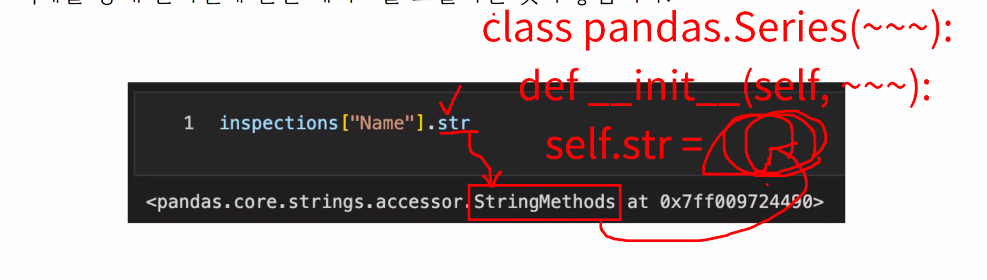

### < 문자열의 strip 계열 메서드 >

- strip 계열 메서드를 사용하면 문자열의 공백을 제거할 수 있습니다.

- lstrip() 메서드는 left를 의미하며 왼쪽의 연속된 공백을 제거합니다.

- rstrip() 메서드는 right를 의미하며 오른쪽의 연속된 공백을 제거합니다.

- strip() 메서드는 양쪽 끝의 연속된 공백을 제거합니다

In [91]:
dessert = " cheesecake "
dessert

' cheesecake '

In [89]:
dessert.lstrip()

'cheesecake '

In [87]:
dessert.rstrip()

' cheesecake'

In [88]:
dessert.strip()

'cheesecake'

### < StringMethods의 strip 메서드 >

- StringMethods 객체에도 이 세 종류의 strip 계열 메서드를 활용할 수 있습니다.
- 이 메서드는 기존의 Series 객체를 inplace하는 것이 아닙니다. 
- 따라서 공백을 제거한 값으로 변경하려면 아래 코드와 같이 기존 Series를 재할당해야 합니다.

Name 컬럼이 지금은 하나있는데
만약, 100개의 컬럼에 대해서 공백 작업을 해줘야되면 어떻게 해야돼??

==> for column in inspections.columns :

    inspections[column] = inspections[column].str.strip()

In [99]:
inspections["Name"] = inspections["Name"].str.strip()
inspections["Name"] 

0         MARRIOT MARQUIS CHICAGO
1                      JETS PIZZA
2                       ROOM 1520
3                             NaN
4                             NaN
                   ...           
153805                        NaN
153806                        NaN
153807                        NaN
153808                        NaN
153809                        NaN
Name: Name, Length: 153810, dtype: object

In [95]:
inspections["Name"].str.lstrip().head(3)

0    MARRIOT MARQUIS CHICAGO
1                 JETS PIZZA
2                  ROOM 1520
Name: Name, dtype: object

In [96]:
inspections["Name"].str.rstrip().head(3)

0    MARRIOT MARQUIS CHICAGO
1                 JETS PIZZA
2                  ROOM 1520
Name: Name, dtype: object

In [98]:
inspections["Name"].str.strip().head(3)

0    MARRIOT MARQUIS CHICAGO
1                 JETS PIZZA
2                  ROOM 1520
Name: Name, dtype: object

- 앞의 한 줄짜리 코드는 하나의 컬럼에 대해서만 적용됩니다. 
- 만약 컬럼의 개수가 많다면 일일이 코드를 한 줄, 한 줄 작성해야겠죠?
- 아래의 코드는 모든 컬럼에 대해서 동적으로 앞뒤 공백을 제거해줄 수 있습니다.

In [100]:
inspections.columns

Index(['Name', 'Risk'], dtype='object')

for column in inspections.columns :
    inspections[column] = inspections[column].str.strip()

### < Risk 컬럼 파악하기 Series.unique() 메서드 >
- Risk 열을 살펴보겠습니다. 이 열은 ‘1’과 같은 숫자와 ‘High’ 같은 범주형 값으로 
구성되어 있습니다. 또 nan 값도 존재하며, ‘All’이라는 값도 섞여 있음을 확인할 수 
있습니다.

- Series 객체의 unique() 메서드는 해당 Series의 고유한 값을 ndarray 형태로 
반환해줍니다.

In [103]:
inspections["Risk"].unique()

array(['Risk 1 (High)', 'Risk 2 (Medium)', 'Risk 3 (Low)', 'All', nan],
      dtype=object)

### < Risk 컬럼의 모든 값을 일관된 형식으로 처리하기 >
- Risk 열의 모든 값이 일관된 형식 갖출 수 있도록 하는 것을 목표로 하겠습니다. 
결측치는 제거하고 ‘All’ 문자열은 ‘Risk 4 (Extreme)’으로 치환해서 그 목표를 달성하려 
합니다.
우선 아래의 코드를 통해서 결측치를 제거해보도록 하겠습니다.



- 결측치 제거가 제대로 이뤄졌는지 확인해봅시다. 잘 처리된 것을 확인할 수 있습니다.


### < DataFrame replace() 메서드로 값 치환하기 >

DataFrame 객체의 replace() 메서드는 값을 치환할 때 사용하면 유용합니다. 메서드 첫 
인수는 to_replace로 검색할 값을 지정하고 두 번째 인수는 value로 변경할 값을 
전달하면 됩니다.

- 아래의 코드는 ‘All’ 문자열을 ‘Risk 4 (Extreme)”으로 치환합니다.

### < 문자열 인덱싱 >
- StringMethods 객체에 인덱싱을 통해 하나의 문자를 추출할 수 있습니다. 아래의 
코드는 인덱싱을 통해 숫자 값만 가져오는 방법입니다

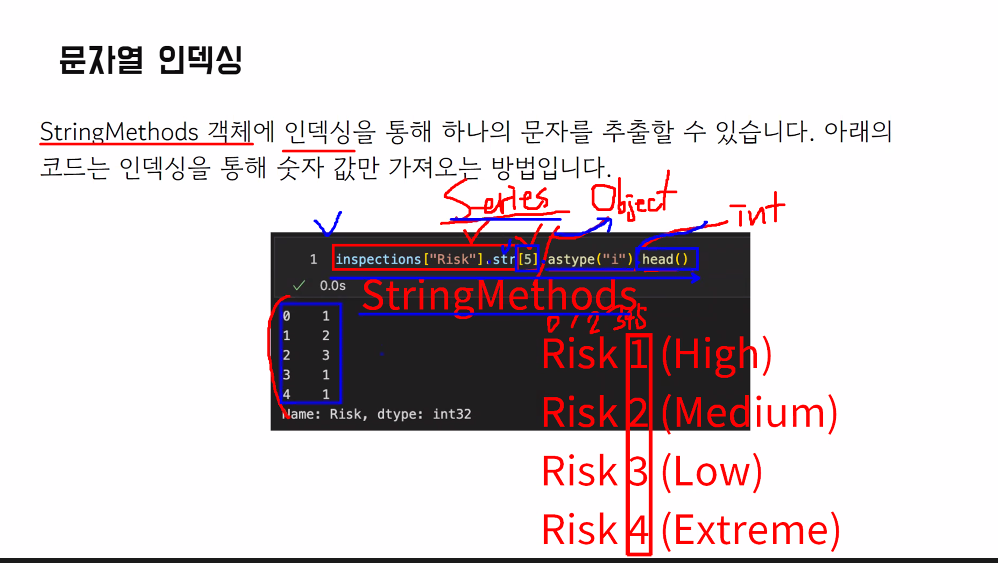

In [ ]:
시리즈에inspections["Risk"] 대해서 인덱싱

### < 문자열 슬라이싱 >
- StringMethods 객체에 슬라이싱을 통해 부분 문자열을 추출할 수 있습니다. 아래의 
코드는 슬라이싱을 통해 ‘Low’, ‘Medium’, ‘High’, ‘Extreme’ 값만 가져오는 방법입니다.

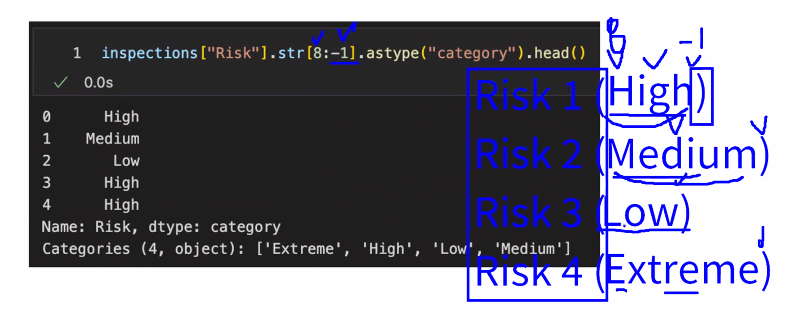

In [ ]:
01234567
Risk 1 ( ////여기까지는 길이가 똑같으니까!!!
        str[8 ->여기부터  -1  <- 이렇게 하면 ()안에 High Medium 이런데이터 찾을수 있찌
    

In [104]:
inspections["Risk"].str[8:-1].astype("category").head()

0      High
1    Medium
2       Low
3      High
4      High
Name: Risk, dtype: category
Categories (4, object): ['', 'High', 'Low', 'Medium']

## 강사님 예제 추가 설명

In [106]:
inspections

,Name,Risk
0,MARRIOT MARQUIS CHICAGO,Risk 1 (High)
1,JETS PIZZA,Risk 2 (Medium)
2,ROOM 1520,Risk 3 (Low)
3,NaN,Risk 1 (High)
4,NaN,Risk 1 (High)
...,...,...
153805,NaN,Risk 1 (High)
153806,NaN,Risk 2 (Medium)
153807,NaN,Risk 1 (High)
153808,NaN,Risk 1 (High)


In [105]:
inspections.Risk.unique()

array(['Risk 1 (High)', 'Risk 2 (Medium)', 'Risk 3 (Low)', 'All', nan],
      dtype=object)

In [107]:
inspections.dropna(subset = ["Risk"])

,Name,Risk
0,MARRIOT MARQUIS CHICAGO,Risk 1 (High)
1,JETS PIZZA,Risk 2 (Medium)
2,ROOM 1520,Risk 3 (Low)
3,NaN,Risk 1 (High)
4,NaN,Risk 1 (High)
...,...,...
153805,NaN,Risk 1 (High)
153806,NaN,Risk 2 (Medium)
153807,NaN,Risk 1 (High)
153808,NaN,Risk 1 (High)


In [111]:
inspections = inspections.dropna(subset = ["Risk"])

In [112]:
inspections.Risk.unique()

array(['Risk 1 (High)', 'Risk 2 (Medium)', 'Risk 3 (Low)', 'All'],
      dtype=object)

In [114]:
inspections = inspections.replace(
    to_replace = "All", value = 'Risk 4 (Extreme)'
)

In [115]:
inspections.Risk.unique()

array(['Risk 1 (High)', 'Risk 2 (Medium)', 'Risk 3 (Low)',
       'Risk 4 (Extreme)'], dtype=object)

In [118]:
inspections.Risk.str[5]

0         1
1         2
2         3
3         1
4         1
         ..
153805    1
153806    2
153807    1
153808    1
153809    1
Name: Risk, Length: 153744, dtype: object

In [119]:
inspections.Risk.str[5].astype("i4")

0         1
1         2
2         3
3         1
4         1
         ..
153805    1
153806    2
153807    1
153808    1
153809    1
Name: Risk, Length: 153744, dtype: int32

In [120]:
'Risk 1 (High)'[8]

'H'

In [124]:
'Risk 1 (High)'[8: -1]

'High'

In [123]:
'Risk 2 (Medium)'[8]

'M'

In [125]:
'Risk 2 (Medium)'[8:-1]

'Medium'

In [127]:
inspections.Risk.str[8: -1]

0           High
1         Medium
2            Low
3           High
4           High
           ...  
153805      High
153806    Medium
153807      High
153808      High
153809      High
Name: Risk, Length: 153744, dtype: object

In [128]:
inspections.Risk.str[8: -1].astype("category")

0           High
1         Medium
2            Low
3           High
4           High
           ...  
153805      High
153806    Medium
153807      High
153808      High
153809      High
Name: Risk, Length: 153744, dtype: category
Categories (4, object): ['Extreme', 'High', 'Low', 'Medium']

### < 일치하는 문자열 필터링하기 contains() 메서드 >

하위 문자열이 포함되는지 확인할 때 사용하는 메서드로 contains()가 있습니다. 문자열 
비교에 대소문자를 구분하기 때문에 이와 관계없이 일치하는 문자열을 찾고자 할 때는 
대소문자 표기법을 통일하는 것이 좋습니다. 

In [130]:
has_pizza = inspections["Name"].str.lower().str.contains("pizza")
inspections[has_pizza]

ValueError: Cannot mask with non-boolean array containing NA / NaN values

In [132]:
inspections.Name = inspections.Name.str.strip()

In [133]:
inspections.Name

0         MARRIOT MARQUIS CHICAGO
1                      JETS PIZZA
2                       ROOM 1520
3                             NaN
4                             NaN
                   ...           
153805                        NaN
153806                        NaN
153807                        NaN
153808                        NaN
153809                        NaN
Name: Name, Length: 153744, dtype: object

In [134]:
inspections.Name.str

In [ ]:
has_pizza = inspections["Name"].str.lower().str.contains("pizza")
inspections[has_pizza]